# Désabonnement des clients  sur les données d'orange 

# Table de matière

In [1]:
#Contexte
#Data Overview (Description)


**L' attrition**, également connu sous le nom de **désabonnement des clients** , le chiffre d'affaires des clients, ou défections de clients, est la perte de clients.**Les banques , les sociétés de services téléphoniques, les fournisseurs de services Internet , les sociétés de télévision payante, les compagnies d' assurance et les services de surveillance** des alarmes utilisent souvent l'analyse de l'attrition des clients et les taux d'attrition des clients comme l'un de leurs principaux paramètres commerciaux (avec les flux de trésorerie, l' EBITDA , etc.) parce que le coût de la conservation d'un client existant est bien moindre que l' acquisition d'un nouveau .
Dans le processus d'omboarding client pour entreprises qui ont des services Saas ,ces techniques sont souvent utilisé par le département marketing..


Ce basant sur les données de la compagnie de téléphonie orange, le but de ce projet sera d'analyser les données et les tendances qui seront utiles pour le département marketing et aussi de prédire si un client va se désabonner ou pas à l'abonnement.

# Data Overview

In [82]:
## loading Data
## Description 

In [181]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [129]:
#import du data set
churn=pd.read_excel("OrangeData.xlsx")

In [114]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
# Description
print ("\nFeatures : \n" ,churn.columns.tolist())


Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


    
* **customerID** : Identifiant du client.<br/>
* **Gender:**  qu'il soit de sexe masculin ou féminin.<br/>
* **SeniorCitizen** : Qu'il s'agisse d'un client âgé ou non (1, 0).<br/>
* **Partner:** Que le client ait un partenaire ou non (Oui, Non).<br/>
* **Dependant:** Que le client ait des personnes à charge ou non (Oui, Non).<br/>
* **tenure:** Nombre de mois pendant lesquels le client est resté dans l'entreprise.<br/>
* **PhoneService:** Que le client dispose d'un service téléphonique ou non (Oui, Non).<br/>
* **MultipleLines:** Que le client dispose de plusieurs lignes ou non (Oui, Non, Pas de service téléphonique).<br/>
* **InternetService:** Fournisseur d'accès à Internet du client (DSL, Fibre optique, Non).<br/>
* **OnlineSecurity:** Que le client dispose ou non d'une sécurité en ligne (Oui, Non, Pas de service internet).<br/>
* **OnlineBackup**Que le client dispose ou non d'une sauvegarde en ligne (Oui, Non, Pas de service internet).<br/>
* **DeviceProtection:** - que le client dispose ou non d'une protection des appareils (oui, non, pas de service internet.<br/>
* **TechSupport:** Que le client bénéficie ou non d'une assistance technique (Oui, Non, Pas de service internet).<br/>
* **StreamingTV:** Que le client dispose ou non d'un service de streaming TV (Oui, Non, Pas de service internet).<br/>
* **StreamingMovies:** Que le client ait des films en streaming ou non (Oui, Non, Pas de service internet).<br/>
* **Contrat** La durée du contrat du client (mois à mois, un an, deux ans).<br/>
* **PaperlessBilling** Que le client ait ou non une facturation sans papier (Oui, Non).<br/>
* **PaymentMethod:**  Le mode de paiement du client (Chèque électronique, Chèque postal, Virement bancaire (automatique), Carte de crédit (automatique)).<br/>
* **MonthlyCharges:** Le montant facturé au client chaque mois.<br/>
* **TotalCharges:** Le montant total facturé au client.<br/>
* **Churn**: le client  se désabonne ou non (oui ou non).<br/>

In [87]:
# global information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [115]:
#global informations
print('Notre data set contient {} Colonnes,and {} lignes '.format(churn.columns.value_counts().count(),churn.index.value_counts().count()))
print ("\nStandart Missing values :  ", churn.isnull().sum().values.sum())# on a just check les missing value standard
print ("\nUnique values :  \n",churn.nunique())

Notre data set contient 21 Colonnes,and 7043 lignes 

Standart Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


 régardons aussi les valeurs manquantes non standard

In [160]:
missing_values_non_standard = ["n/a", "na", " "]
df=pd.read_excel("OrangeData.xlsx",na_values=missing_values_non_standard)
# regardons leurs pourcentage dans notre data set 
total_missing_non_standard=df.isnull().sum().sort_values(ascending=False)
percent_non_standard = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_values_non_standard = pd.concat([total_missing_non_standard, percent_non_standard], axis=1, keys=['Total_missing', 'Percent'])
missing_values_non_standard.head(5)

,Total_missing,Percent
TotalCharges,11,0.001562
Churn,0,0.000000
OnlineSecurity,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000


On constate que Total charge à quelques valeurs manquantes. . Ces valeurs sont en fait un espace vide dans le dataset et sont exclusives pour les clients dont la durée d'occupation (tenure) est nulle. Il est possible de conclure qu'elles sont manquantes, car le client n'a jamais rien payé à la société.Nous décidons de retirer ces valeur déjà car elle représente les clients qui n'ont presque pas utilisé notre service et ensuite car la proportion représente seulement **0.15 %** du dataset . Il n'a pas utilisé le service

In [90]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Data Manipulation


Dans cette partie, on va nettoyer nos données et faire un peu du feature engineering. En bref, on va enrichir nos données pour permettre une visualisation plus expressive et compréhensible .

In [161]:
#là on essaie un peu de remplacer ces valeurs 
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
#On prend ensuite notre dataset laissant les nan
df= df[df["TotalCharges"].notnull()]
df= df.reset_index()[df.columns]# on a just renitialiser les indexe de notre data set
#Dans la première partie data overview la colonne Totalcharges etait considéré comme un object .on vas la changé en float.
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [162]:
#remplaçons 'No internet service' en  No .
col_a_remplacer = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in col_a_remplacer : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [163]:
# Comme nous n'avons pas de dates, essayons de ségmenter en tranche les durées d'occupations en période :
def tranche_tenure(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"
df["groupe_Months"] = df.apply(lambda df:tranche_tenure(df),axis = 1)

In [142]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,groupe_Months
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [96]:
# séparons notre data en churn et non churn
#Churn  = df[df["Churn"] == "Yes"]
#not_churn = df[df["Churn"] == "No"]

# Exploratory Data Analysis

In [122]:
import plotly.offline as py#Plotly est une librairie pour les graphique dynamique
#https://plotly.com/python/choropleth-maps/
py.init_notebook_mode(connected=True)#je connecte à mon notebook
import plotly.graph_objs as go#
import plotly.tools as tls#
import plotly.figure_factory as ff#

### Pour les variables numeriques.

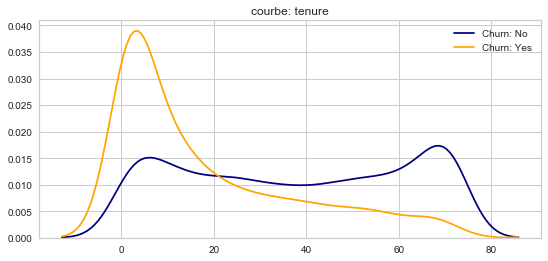

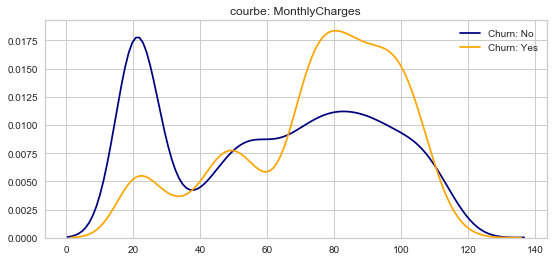

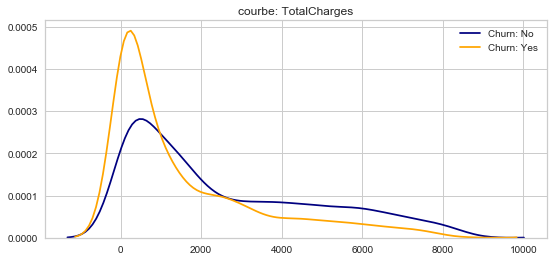

In [164]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("courbe: {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Comme observations ont peut dire que:
* Les clients récents sont plus susceptibles de changer d'avis.
* Les clients dont la cotisation mensuelle est plus élevée sont également plus susceptibles de changer de prestataire.
* La permanence (tenure) et les chartes mensuelles sont probablement des éléments importants

## Pour les valeurs catégorielle

#### Part des abonnées qui churn et qui reste

<Figure size 864x720 with 0 Axes>

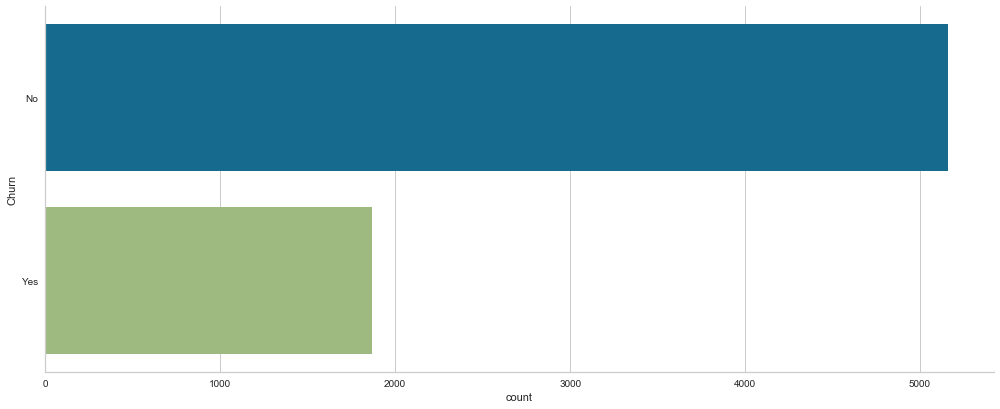

In [165]:
plt.figure(figsize=(12,10))
ax = sns.catplot(y="Churn", kind="count", data=df, height=5.6, aspect=2.5)
etique = df["Churn"].value_counts().keys().tolist()# pour l'étiquetage avec le curseur
valeur = df["Churn"].value_counts().values.tolist()# pour la valeur

trace = go.Pie(labels = etique ,
               values = valeur ,
               marker = dict(colors =  [ 'red' ,'blue'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Les clients qui se désabonne",
                        plot_bgcolor  = "rgb(255, 255, 255)",
                        paper_bgcolor = "rgb(255, 255, 255)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)


In [166]:
df['groupe_Months'].unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

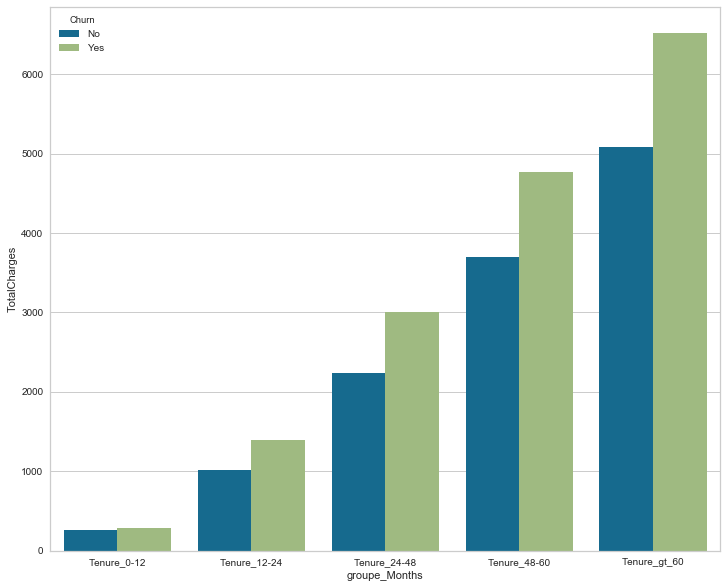

In [167]:
plt.figure(figsize=(12,10))
sns.barplot(x='groupe_Months',y='TotalCharges',data=df,hue='Churn',ci=None,order=['Tenure_0-12', 'Tenure_12-24','Tenure_24-48',
       'Tenure_48-60','Tenure_gt_60'])

In [168]:
# je retire ma colonne que j'ai créer mais se serais bien après si je regarde dans un algo de clustering l'impact du normbre d'année sur la décision de churn ou non
df.drop(columns = "groupe_Months",axis = 1,inplace=True)

# Data Prepocessing

Dans cette partie je vais transformer mes données ,les preparer pour lançer mes modèles

In [169]:
from sklearn.preprocessing import LabelEncoder#LabelEncoder Encodez les features cibles avec une valeur comprise entre 0 et n_classes-1.
from sklearn.preprocessing import StandardScaler# pour put à l'échelle mon dataset

Dans la partie Data Overview, nous avons divisé sauvegardez dans deux vercteurs les features catergoriel et numeriques.Nous allons aussi sauvegarder les features qui ont 2 valeurs(binaire) dans un vecteur et aussi ceux qui on plus de deux valeurs dans un autres.

In [170]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
#features avec deux valeurs
feat_2=df.nunique()[df.nunique()==2].keys().tolist()
print(feat_2)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


Pour avoir les features avec plus de 3 valeurs, je prends uniquement les colonnes qui sont dans la liste cat_cols qu'on a créé sans ceux qui sont compris dans feat_2. Mais d'abord, séparons aussi en variable catégorielle et Numérique


In [172]:
Id     = ['customerID']
target = ["Churn"] # Variable à prédire
categories   = df.nunique()[df.nunique() < 6].keys().tolist()# l'explication plus haut dont je parlais
categories   = [x for x in categories if x not in target]# on prend tous sauf la target
numerique   = [x for x in df.columns if x not in categories + target + Id]# je prend seulement mes variable numerique
#features avec plus de 2 valeurs
feat_3=[x for x in categories if x not in feat_2]
print(feat_3)

['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']


In [173]:
#Encodons maintenant nos colonne binaires
for i in feat_2 :
    df[i] = LabelEncoder().fit_transform(df[i])
#transformons aussi feat_3 le reste en dummies variables
df= pd.get_dummies(data = df,columns =feat_3)

In [174]:
#regardons notre data set 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Esayons de mettre à l'échelle les valriables numeriques de notre data set

In [175]:
scaled = StandardScaler().fit_transform(df[numerique])
Data_scaled = pd.DataFrame(scaled,columns=numerique)

on merge ça (Data_scaled) avec notre dataset tout enlevant les mêmes colonnes non scalées

In [176]:
orange_copy= df.copy()#je garde just une copy de mon dataframe
df.drop(columns = numerique,axis = 1,inplace=True)
df = df.merge(Data_scaled,left_index=True,right_index=True,how = "left")

In [177]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


regardons la correlation entre les variables.

In [178]:
corr_df=df.corr()

In [179]:
corr_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,0.007877,0.248033,0.113008
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631,0.325288,0.338301,0.432868
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,-0.112550,0.061930,0.072124,0.046121,0.040010,0.144747,-0.247712,0.280264,0.629668,0.515709


Mettons le un peu dans un map chart dynamique avec notre librairie iplot

In [182]:
#comme dab on définit d'abord la list de nos étiquètes qui serons utilisé 
corr_feat = corr_df.columns.tolist()
#convert to array
corr_array  = np.array(corr_df)

plt.figure(figsize=(20,20))
trace = go.Heatmap(z = corr_array,
                   x = corr_feat,
                   y = corr_feat,
                   colorscale = "Viridis",
                   colorbar   = dict(title = " coefficient de Pearson  ",
                                     titleside = "right"
                                    ) ,
                  )
# comme dab aussi on gère la présentation ici
layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<Figure size 1440x1440 with 0 Axes>

# Modelisation

## training and testing Data

In [308]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = .3 ,random_state = 100,stratify=df.Churn)#pour se rassurer que le train et test on la meme proportion de churn
ind_var=[k for k in df.columns if k not in Id  + target]
train_X = train[ind_var]
train_Y = train[target]
test_X  = test[ind_var]
test_Y  = test[target]

In [289]:
#X = df.drop(['Churn','customerID'], axis=1)
#y = df.Churn

#train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.3,random_state=100, stratify=y)

In [283]:
#np.array(test_Y).reshape(-1, 1)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

# Logistic regression

In [245]:
from sklearn.linear_model import LogisticRegression
#from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.filterwarnings("ignore")
logmodel=LogisticRegression(penalty='l1',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,
                           random_state=None,solver='liblinear',max_iter=100,multi_class='ovr',verbose=1)
#logmodel.fit(train_X,train_Y)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

# Random Forest

In [254]:
#https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/
#https://www.datacamp.com/community/tutorials/adaboost-classifier-python
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
rfmodel = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,
                           min_weight_fraction_leaf=0.0,max_features='auto',bootstrap=True,oob_score=False,
                           n_jobs=1,random_state=None,verbose=0)
#rfmodel.fit(train_X,train_Y)

# AdaboostClassifier

In [192]:
from sklearn.ensemble import AdaBoostClassifier
adamodel= AdaBoostClassifier()
#adamodel.fit(train_X,train_Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

# GradientBoosting

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
gradmodel=GradientBoostingClassifier()
#gradmodel.fit(train_X,train_Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Knn

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knmodel = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None)

Au mieux je peux créer une focntion qui vas entrainer tous mes models au cas ouu j'en ajoute

In [305]:
models ={'Logistic Regression':logmodel,'adaBoostClassifier':adamodel,'Random Forest':rfmodel,'gradient boost':gradmodel,'Kneighbors':knmodel}
models.keys()

dict_keys(['Logistic Regression', 'adaBoostClassifier', 'Random Forest', 'gradient boost', 'Kneighbors'])

In [272]:
def model_functions(train_X,train_Y,models):
    for label,model in models.items():
        model.fit(train_X,train_Y)

In [306]:
model_functions(train_X,train_Y,models)

[LibLinear]

# Model Evaluation

In [307]:
from sklearn.metrics import roc_auc_score

je crait aussi une fonction pour tester mes models

In [309]:
evaluation=pd.DataFrame(columns=['accuracy_score','AUC-ROC_score'],index=models.keys())
def testingfunc(test_X,test_Y,models,lscore='accuracy_score',auc='AUC-ROC_score'):
    for label,model in models.items():
        score=str(round(model.score(test_X,test_Y),2))
        labels=model.predict_proba(np.array(test_X.values))[:,1]# je ne veux que la probabilité d'obtenir la cible 1
        roc=str(round(roc_auc_score(test_Y,labels,average='macro',sample_weight=None),2))
        evaluation.loc[label,lscore]=score
        evaluation.loc[label,auc]=roc
    return evaluation

In [310]:
testingfunc(test_X=test_X,test_Y=test_Y,models=models,lscore='accuracy_score',auc='AUC-ROC_score')

,accuracy_score,AUC-ROC_score
Logistic Regression,0.81,0.84
adaBoostClassifier,0.8,0.84
Random Forest,0.79,0.8
gradient boost,0.81,0.85
Kneighbors,0.76,0.78


En fait, la moyenne de précision ne tient compte que d'une seule valeur seuil, tandis que la ROC-AUC prend en considération toutes les valeurs seuils possibles et renvoie le score. Nous constatons que la régression logistique, l'adaBoost et le gradient boosting nous donnent le meilleur ROC-AUC. Leurs scores sont également très compétitifs. Je choisis donc de maintenant de works seulement avec la régression logistique et le gradient boosting pour voir comment je peux améliorer les prédictions.

L'une des choses que je vais faire, c'est chercher les meilleurs paramètres pour chacun de mes models et renvoyer le meilleures. Je le ferais un peu plus bas. Je vais d'abord chercher les variables importantes pour relancer mon model.Pour cela je peux utiliser les propriétés d'un model.Je peux utiliser ExtraTressClassifier ou bien même le random forest.

In [328]:
model_importance = RandomForestClassifier(n_estimators=500,random_state=1)
model_importance.fit(train_X,train_Y)
feat_importances = pd.Series(model_importance.feature_importances_, index=train_X.columns)
print(feat_importances.shape)
print("*"*100)
print(feat_importances)


(28,)
****************************************************************************************************
gender                                     0.028615
SeniorCitizen                              0.020570
Partner                                    0.023146
Dependents                                 0.019590
PhoneService                               0.003984
OnlineSecurity                             0.022863
OnlineBackup                               0.020431
DeviceProtection                           0.018297
TechSupport                                0.021837
StreamingTV                                0.017368
StreamingMovies                            0.018145
PaperlessBilling                           0.026095
MultipleLines_No                           0.012654
MultipleLines_No phone service             0.004078
MultipleLines_Yes                          0.012871
InternetService_DSL                        0.010528
InternetService_Fiber optic                0.032167
InternetS

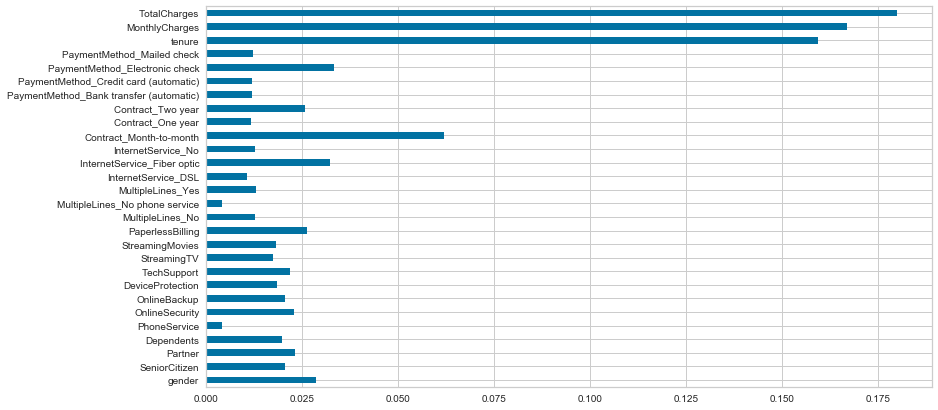

In [324]:
plt.figure(figsize=(13,7))
feat_importances.plot(kind='barh')
plt.show()

In [353]:
from sklearn.feature_selection import SelectFromModel
sm=SelectFromModel(model_importance, threshold=0.012,prefit=True)
n_features=sm.transform(train_X)
indices = np.argsort(model_importance.feature_importances_)[::-1]
col_selec=[]
for i in range(n_features.shape[1]):
    col_selec.append(train_X.columns[indices[i]])
    print("%2d) %-*s %f"%(i+1,30,train_X.columns[indices[i]],model_importance.feature_importances_[indices[i]]))


 1) TotalCharges                   0.179871
 2) MonthlyCharges                 0.166894
 3) tenure                         0.159130
 4) Contract_Month-to-month        0.061877
 5) PaymentMethod_Electronic check 0.033237
 6) InternetService_Fiber optic    0.032167
 7) gender                         0.028615
 8) PaperlessBilling               0.026095
 9) Contract_Two year              0.025687
10) Partner                        0.023146
11) OnlineSecurity                 0.022863
12) TechSupport                    0.021837
13) SeniorCitizen                  0.020570
14) OnlineBackup                   0.020431
15) Dependents                     0.019590
16) DeviceProtection               0.018297
17) StreamingMovies                0.018145
18) StreamingTV                    0.017368
19) MultipleLines_Yes              0.012871
20) MultipleLines_No               0.012654
21) InternetService_No             0.012630
22) PaymentMethod_Mailed check     0.012119


je relance mon model

In [365]:
#evaluation.drop("NewAUC-ROC",axis=1,inplace=True)

In [ ]:
#comme Totlcharges et tenure sont fortement corrélé.
X_train_new.drop('TotalCharges',inplace=True,axis=1)

In [415]:
X_test_new.drop('TotalCharges',inplace=True,axis=1)

In [416]:
#X_train_new=train_X[col_selec]
#X_test_new=test_X[col_selec]

#training with best features
model_functions(X_train_new,train_Y,models=models)
#Testing with best features
evaluation["Newaccuracy_cscore"]=""
evaluation["NewAUC-ROC"]=""
testingfunc(X_test_new,test_Y,models=models,lscore='Newaccuracy_cscore',auc='NewAUC-ROC')

[LibLinear]

,accuracy_score,AUC-ROC_score,Newaccuracy_cscore,NewAUC-ROC,hyper1AUC-ROC
Logistic Regression,0.81,0.84,0.81,0.84,NaN
adaBoostClassifier,0.8,0.84,0.8,0.85,0.85
Random Forest,0.79,0.8,0.78,0.79,NaN
gradient boost,0.81,0.85,0.81,0.85,0.85
Kneighbors,0.76,0.78,0.77,0.78,NaN


# hyperparameter

Je vais juste m'intéresser au adaboost et au gradient boost . Je vais essayer maintenant de chercher les paramètres optimaux de ces models et déterminer le plus bon entre eux.

In [421]:
from sklearn.model_selection import RandomizedSearchCV
adaParams ={'n_estimators':[10,50,200,420]}
gridSearchada = RandomizedSearchCV(estimator=adamodel,param_distributions=adaParams,n_iter=4, scoring='roc_auc').fit(X_train_new,train_Y)

j'affiche mes meuilleurs paramettres et mon score

In [418]:
gridSearchada.best_estimator_,gridSearchada.best_score_

(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None), 0.8425769696712205)

In [419]:
from scipy.stats import randint
gbParams = {'loss' :['deviance','exponential'],'n_estimators' : randint(10,500), 'max_depth':randint(1,10)}
gridSearchGB= RandomizedSearchCV(estimator=gradmodel,param_distributions=gbParams,n_iter=10,scoring='roc_auc',cv=5).fit(X_train_new,train_Y)

In [420]:
gridSearchGB.best_params_,gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 5, 'n_estimators': 15},
 0.8422278770045546)

je teste maintenant mes nouveaux paramettres

In [384]:
bestada = gridSearchada.best_estimator_.fit(X_train_new,train_Y)
bestgboosting=gridSearchGB.best_estimator_.fit(X_train_new,train_Y)
# score pour l'adaboost
ada_labels = bestada.predict_proba(np.array(X_test_new))[:,1]
bestadaroc=round(roc_auc_score(test_Y,ada_labels, average='macro',sample_weight=None),2)
# score pour le gradient boost
gb_labels = bestgboosting.predict_proba(np.array(X_test_new))[:,1]
bestgbroc=round(roc_auc_score(test_Y,gb_labels, average='macro',sample_weight=None),2)
evaluation.loc['adaBoostClassifier','hyper1AUC-ROC']=bestadaroc
evaluation.loc['gradient boost','hyper1AUC-ROC']=bestgbroc

In [385]:
evaluation.head(5)

,accuracy_score,AUC-ROC_score,Newaccuracy_cscore,NewAUC-ROC,hyper1AUC-ROC
Logistic Regression,0.81,0.84,0.81,0.84,NaN
adaBoostClassifier,0.8,0.84,0.8,0.85,0.85
Random Forest,0.79,0.8,0.78,0.79,NaN
gradient boost,0.81,0.85,0.81,0.85,0.85
Kneighbors,0.76,0.78,0.76,0.78,NaN


pas de changement . tester tous les paramettre me senblerais long.soit je vais essayer un gridsearch plutot .Puis regarder aussi les autres metrics
mais bon j'éssaie d'abord le voting classifier

In [411]:
from sklearn.metrics import classification_report
ada_pred = bestada.predict(X_test_new)
report=classification_report(test_Y,ada_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [412]:
from sklearn.metrics import classification_report
ada_pred = bestgboosting.predict(X_test_new)
report=classification_report(test_Y,ada_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.68      0.54      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



# Vote Classifier

In [423]:
from sklearn.ensemble import VotingClassifier
m1 = GradientBoostingClassifier(loss='exponential', max_depth=1, n_estimators= 241)
m2 = LogisticRegression(penalty='l1',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='liblinear',max_iter=100,multi_class='ovr',verbose=1)
m3 = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,n_estimators=50, random_state=None)
#m4 = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None)
vc = VotingClassifier(estimators=[('lr', m1), ('rf', m2), ('gnb', m3)], voting='soft')
vc.fit(X_train_new, train_Y)
predictions = vc.predict(X_test_new)
print(accuracy_score(test_Y, predictions))

[LibLinear]0.8123222748815165


In [1]:
# je regarde si il y a overfit

In [424]:
predictionss = vc.predict(X_train_new)
print(accuracy_score(train_Y, predictionss))

0.8061763510767981
